In [94]:
using Plots
using JLD2
using FileIO
using LaTeXStrings
using Glob

function get_files(direct,filenames)
    filenames=glob(filenames,direct)
    return filenames
end


upscale = 1 #8x upscaling in resolution
fntsm = Plots.font("sans-serif", pointsize=round(10.0*upscale))
fntlg = Plots.font("sans-serif", pointsize=round(14.0*upscale))
default(titlefont=fntlg, guidefont=fntlg, tickfont=fntsm, legendfont=fntsm)
default(size=(800*upscale,600*upscale)) #Plot canvas size

In [95]:
include("../src/Self_recognition-Simulations.jl")

Make_eigenvalue_eigenvectors_stats (generic function with 1 method)

In [96]:
#Building transition in the Hopfield temperature β_H 

l=100
compartments=1
n=10
mu_eff= 0.02
λ= 0.05



mu=mu_eff/n
βeqs= exp.(range(-3,stop=10,length=10))*n
eq_steps=10000
γ=1-λ
reps=10
runin=max(10*n,min.(floor.(Int64,log(0.0001)./ log.(γ) .+1)))

steps=runin

performances=get_mean_overlaps_One.(l,n,mu,γ,runin,steps,reps,eq_steps,βeqs);

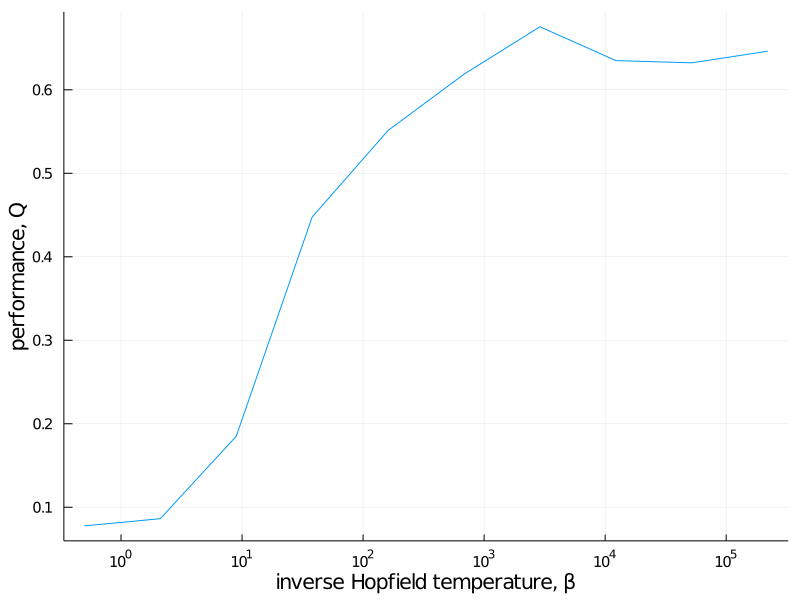

In [97]:
plot(βeqs,performances,xscale=:log10,xlabel="inverse Hopfield temperature, β", ylabel="performance, Q" ,label="")

In [98]:
#Building transition in the compartementalization temperature β_H 


l=20
compartments=10
n=10
mu_eff= 0.02
λ= 0.999



mu=mu_eff/n
β_comp= exp.(range(-3,stop=4,length=10))
eq_steps=1 ## we do not care about the reconstruction performance here only about the allocation to compartmetns 
γ=1-λ
reps=10
runin=max(10*n,min.(floor.(Int64,log(0.0001)./ log.(γ) .+1)))

steps=10000# increase the steps to colect data 


entorpy_recognition_single =Vector{Float16}()

for β in β_comp
    states_presentes,compartment_used,dumi1,dumi2,overlaps= get_statistics_compartment(l,n,mu,γ,β,runin,compartments,steps,reps,eq_steps,1.0)
    append!(entorpy_recognition_single, entropy_compartments_vs_patterns(compartment_used,states_presentes))
end


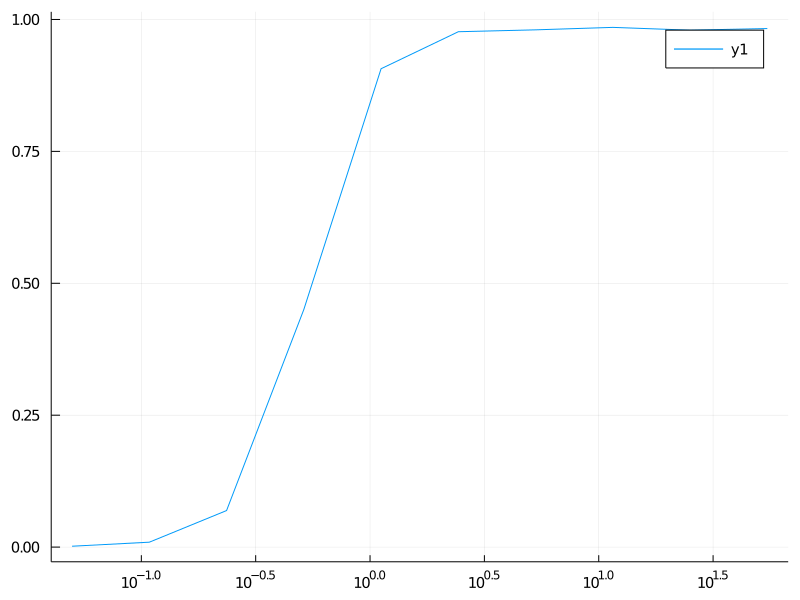

In [99]:

plot(β_comp,1 .-  entorpy_recognition_single./log2(n),xscale=:log10 )